<a href="https://colab.research.google.com/github/Cliff12001/IMSE-441/blob/main/IMSE_441_Lab_6_Makeup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

#statistic 
import scipy as scipy
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [3]:
url = "https://raw.githubusercontent.com/KhmAsif/IMSE441/main/biodiesel_data.csv"
df = pd.read_csv(url)
df.head()

,obs,iodine_amt,cetane_rating
0,1,132.0,46.0
1,2,129.0,48.0
2,3,120.0,51.0
3,4,113.2,52.1
4,5,105.0,54.0


Method 1

In [4]:
x = df[['iodine_amt']]
y= df['cetane_rating']
x

,iodine_amt
0,132.0
1,129.0
2,120.0
3,113.2
4,105.0
5,92.0
6,84.0
7,83.2
8,88.4
9,59.0


In [5]:
model = lm.LinearRegression()
model.fit(x,y)

LinearRegression()

In [6]:
print('Coefficients: ', model.coef_)
print("y-intercept ", model.intercept_)

Coefficients:  [-0.20938742]
y-intercept  75.21243193291976


In [7]:
r_sq = model.score(x, y)
r_sq

0.790760236299126

In [8]:
y_pred = model.predict(x)
y_pred

array([47.57329296, 48.20145521, 50.08594195, 51.50977639, 53.2267532 ,
       55.94878962, 57.62388895, 57.79139888, 56.70258432, 62.85857436,
       58.46143861, 58.14735749, 60.34592536, 60.72282271])

In [9]:
print("mean square error: ", mean_squared_error(y,y_pred))
print("variance or r-squared: ", explained_variance_score(y, y_pred))

mean square error:  5.637132744064508
variance or r-squared:  0.790760236299126


Method 2

In [10]:
import statsmodels.api as sm
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          cetane_rating   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     45.35
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           2.09e-05
Time:                        15:42:36   Log-Likelihood:                -31.971
No. Observations:                  14   AIC:                             67.94
Df Residuals:                      12   BIC:                             69.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.2124      2.984     25.208      0.0

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
print(model1.ssr)

78.91985841690312


In [12]:
residual = y - y_pred
residual

0    -1.573293
1    -0.201455
2     0.914058
3     0.590224
4     0.773247
5    -3.948790
6     1.376111
7     0.908601
8     4.897416
9     1.141426
10    2.938561
11   -3.547357
12   -1.545925
13   -2.722823
Name: cetane_rating, dtype: float64

In [13]:
sse = residual*residual
sse.sum()

78.91985841690311

In [ ]:
%pip install pingouin
import pingouin as pg

Text(0.5, 1.0, 'OUR DATA')

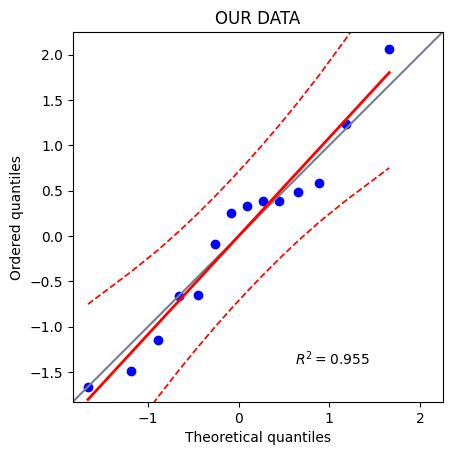

In [15]:
plt.show()            
pg.qqplot(residual).set_title('OUR DATA')